Copyright (c) 2019 OERCompBiomed (UiB)

<h1 style="color:blue">Pandas</h1>

<div class='alert alert-info'>

NOTE: The original notebook on Github might change over the time, and we recommend that you make a copy of our notebooks before you are editing them. In this respect you might adopt the naming convention my_<'name_of_notebook'>.ipynb, e.g. `my_2_pandas_basics.ipynb`

**You are encouraged to experiment with all our code!**

__[*Pandas*](https://pandas.pydata.org)__ is the premier Python package for data analysis. If you're working with data in Python, Pandas is your trusted companion. Pandas is built around the concept of *series* (akin to Numpy vectors) and *data frames* (akin to Numpy matrices). Unlike their Numpy counterparts, Pandas has a rich API that often makes series and data frames more convenient to work with.  It provides a vast array of functions and methods to perform tasks like data cleaning, exploration, aggregation, and visualization with ease.

First though, let's import Pandas. Conventionally it is given the name `pd`.

In [ ]:
# This is how we usually import pandas
import pandas as pd 

# We can also import specific functions in a library: 
from pandas import DataFrame, read_csv

Now that pandas is imported, its functions can be used like this:

`pd.functionName()`

In [ ]:
# Import all other helpful libraries needed for the tutorial

import seaborn as sns  # for visualization

import numpy as np # this is how we usually import numpy, which includes useful mathematical functions etc.
import sys #only needed to determine Python version number

In [ ]:
# Supress some warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# We can print versions of packages
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Seaborn version ' + sns.__version__)

Python version 3.9.17 (main, Jun 13 2023, 16:07:34) 
[GCC 8.3.0]
Pandas version 1.2.5
Numpy version 1.23.4
Seaborn version 0.12.1


# PART I <a name="part1"></a>

Lets dive into data analysis with Panda using a classic and accessible dataset: the Iris flower dataset.

## Iris flower data <a name="irisdata"></a>
https://archive.ics.uci.edu/ml/datasets/iris

<img src='./assets/iris_data_intro.png' alt="iris_data_intro"  />

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

**Attribute Information:**

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: <br>
-- Iris Setosa <br>
-- Iris Versicolour <br>
-- Iris Virginica

Read local data:

In [ ]:
iris = pd.read_csv('./data/iris.data')

# Data exploration in Pandas <a name="dataexploration"></a>

The first thing we usually do after loading a dataframe (i.e. table), is to inspect it using the following methods.

In [ ]:
iris.shape

(150, 5)

This means we have 150 samples (rows) and 5 features per sample (columns). What are those features?

In [ ]:
for col in iris.columns:
    print(col)

SepalLength
SepalWidth
PetalLength
PetalWidth
Name


## Display your samples
Display the 5 first rows using `df.head()`

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


or the 10 first

In [ ]:
iris.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


By now you should know that the input to the `head` function is an optional parameter which defaults to 5. You can confirm this by writing `iris.head()` and pressing Shift+Tab.

or the 5 last using `df.tail()`

In [ ]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


A summary can be presented with `df.info()`.

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here you see the data types each column contains too: the measurements are `float64`, which means 64 bit floating point (decimal) numbers. The *Name* feature is a string, which in pandas terms is an `object`.

In [ ]:
# another way to access the datatypes
iris.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

And `df.describe()` will print a summary of the numerical features.

In [ ]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<div class='alert alert-warning'>

<h4>Exercise 1.</h4>
Imagine you are given some data in a table from your supervisor. You are told this contains 50 physical measurements from a total of 1400 E. *coli* cells. Also you know your supervisor has a messy file system, and easily confuses filenames between different projects. How would you assure that you have been given the right dataset?
</div>

In [ ]:
# Ex1


In [ ]:
# %load solutions/ex2_1.py

---

# Accessing specific rows and columns <a name="accessing"></a>

Indexing pandas dataframes is done by using either of two methods: `.iloc` and `.loc`. Let's start with the former, which is purely number-based (`iloc = integer-location`). 

**NB: Remember Python starts counting at 0!**

In [ ]:
#the 4th row of the 2rd column:

iris.iloc[3, 1]

3.1

In [ ]:
iris.head(4) #checks out

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


Slicing can be done using `:`

In [ ]:
# first 4 rows and 2nd column
iris.iloc[:4, 1]

0    3.5
1    3.0
2    3.2
3    3.1
Name: SepalWidth, dtype: float64

In [ ]:
# rows from 3 to 5 and 1st column
iris.iloc[3:6, 0]

3    4.6
4    5.0
5    5.4
Name: SepalLength, dtype: float64

<div class='alert alert-warning'>

<h4>Exercise 2.</h4> 
We can also pass in arrays or lists to access particular rows and columns. Try to do this to obtain only rows numbered 0, 10, 20 and 30 (and all columns).
</div>

In [ ]:
# Ex2


In [ ]:
# %load solutions/ex2_2.py

So this should act more or less the way you have seen indexing before. `.loc` is slightly different, because it allows you to use **column names** as well:

In [ ]:
iris.loc[:3, 'SepalWidth']

0    3.5
1    3.0
2    3.2
3    3.1
Name: SepalWidth, dtype: float64

Passing in a list of columns:

In [ ]:
iris.loc[147:, ['SepalWidth', 'PetalLength']]

,SepalWidth,PetalLength
147,3.0,5.2
148,3.4,5.4
149,3.0,5.1


<div class='alert alert-warning'>

<h4>Exercise 3.</h4> What species is the 10th, 50th and 100th flower?
    </div>

In [ ]:
# Ex3


In [ ]:
# %load solutions/ex2_3.py

Finally, you can also access a single column by writing `iris.column_name`, which is can save you some time.

In [ ]:
iris.SepalWidth

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidth, Length: 150, dtype: float64

## Boolean indexing

The dataframes contents can be accessed by passing in a list (or equivalent) of the same length as the dataframe, with boolean entries. For instance `df.iloc[[False, True, True...], :]` would not return the first sample, but the second and third... 

In [ ]:
# only the flowers with a sepal length greater than 5 cm
iris.SepalLength >= 5

0       True
1      False
2      False
3      False
4       True
       ...  
145     True
146     True
147     True
148     True
149     True
Name: SepalLength, Length: 150, dtype: bool

We can use this to obtain only a subset of rows with a feature of interest.

In [ ]:
lenghtySepals = iris.SepalLength >= 5   
iris.loc[lenghtySepals,'SepalLength']

0      5.1
4      5.0
5      5.4
7      5.0
10     5.4
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 128, dtype: float64

<div class='alert alert-warning'>
<h4> Exercise 4. </h4>
 a) Obtain only the rows in which the sepalWidth is greater than average.

Hint: you can make use of the `.mean()` method

In [ ]:
iris.SepalWidth.mean()

3.0540000000000003

In [ ]:
# Ex4 a)


<div class='alert alert-warning'>
b) How many such samples are there?

In [ ]:
# b) 


In [ ]:
# %load solutions/ex2_4ab.py

<div class='alert alert-warning'>
c) only the colums which are of datatype `float64`.

In [ ]:
# c)


In [ ]:
# %load solutions/ex2_4c.py

<div class='alert alert-warning'>
d) Use what you know to count the number of samples from each of the species. Are they balanced?


In [ ]:
# d) 


In [ ]:
# %load solutions/ex2_4d.py

As an alternative to boolean indexing, you can use `.query`, so the following are equivalent: 

```python
iris.loc[iris.Name == 'Iris-setosa', :]
iris.query('Name == "Iris-setosa"')
```

# Manipulating dataframes <a name="manipulating"></a>

Before we proceed you should know the basics of removing and adding rows or columns. To remove, we use the `.drop()` method, and to add, we can use `.append()`. By default, the changes are not in place, but returns a copy of the dataframe. To make the change, we have to set `inplace=True`.

In [ ]:
# ROWS
iris.drop(index=[0,2,4,6])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# COLS
iris.drop(columns=['Name'])

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Above we used keyword arguments, but we could also use positional arguments, and also specify the axis (0 for rows, 1 for columns).

Adding rows:

In [ ]:
# make new row:

test_row = {'SepalLength':0, 'SepalWidth':0, 'PetalLength':0, 'PetalWidth':0, 'Name':'test'}
test_row

# we use double square brackets [[]] to ensure it is interpreted as a row and not a column.

{'SepalLength': 0,
 'SepalWidth': 0,
 'PetalLength': 0,
 'PetalWidth': 0,
 'Name': 'test'}

In [ ]:
# add test row to tail of iris dataframe
iris.append(test_row, ignore_index=True).tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,0.0,0.0,0.0,0.0,test


Finally, changing a entries can be done simply by using the `.loc` or `.iloc` attributes.

## Create a table from data

We now want to recreate a table from an old paper based on the same dataset. First, let us import an image from the paper:

<img src='./assets/iris_data_tabular.png' alt="disease network"/>

The table in the image is sorted into three tables based on the name of the flower. Each table then present the values from the other four columns. We therefore start by sorting them based on their name.

In [ ]:
setosa = iris[iris.Name == 'Iris-setosa'].drop(['Name'], axis=1)
versicolor = iris[iris.Name == 'Iris-versicolor'].drop(['Name'], axis=1)
virginica = iris[iris.Name == 'Iris-virginica'].drop(['Name'], axis=1)

n = len(setosa)

We then print each table using a for loop

In [ ]:
print('\t   Iris setosa', '     Iris versicolor', '  Iris virginica')
for k in range(n):
    print(k+1, '\t', setosa.values[k,:], versicolor.values[k,:], virginica.values[k,:])

	   Iris setosa      Iris versicolor   Iris virginica
1 	 [5.1 3.5 1.4 0.2] [7.  3.2 4.7 1.4] [6.3 3.3 6.  2.5]
2 	 [4.9 3.  1.4 0.2] [6.4 3.2 4.5 1.5] [5.8 2.7 5.1 1.9]
3 	 [4.7 3.2 1.3 0.2] [6.9 3.1 4.9 1.5] [7.1 3.  5.9 2.1]
4 	 [4.6 3.1 1.5 0.2] [5.5 2.3 4.  1.3] [6.3 2.9 5.6 1.8]
5 	 [5.  3.6 1.4 0.2] [6.5 2.8 4.6 1.5] [6.5 3.  5.8 2.2]
6 	 [5.4 3.9 1.7 0.4] [5.7 2.8 4.5 1.3] [7.6 3.  6.6 2.1]
7 	 [4.6 3.4 1.4 0.3] [6.3 3.3 4.7 1.6] [4.9 2.5 4.5 1.7]
8 	 [5.  3.4 1.5 0.2] [4.9 2.4 3.3 1. ] [7.3 2.9 6.3 1.8]
9 	 [4.4 2.9 1.4 0.2] [6.6 2.9 4.6 1.3] [6.7 2.5 5.8 1.8]
10 	 [4.9 3.1 1.5 0.1] [5.2 2.7 3.9 1.4] [7.2 3.6 6.1 2.5]
11 	 [5.4 3.7 1.5 0.2] [5.  2.  3.5 1. ] [6.5 3.2 5.1 2. ]
12 	 [4.8 3.4 1.6 0.2] [5.9 3.  4.2 1.5] [6.4 2.7 5.3 1.9]
13 	 [4.8 3.  1.4 0.1] [6.  2.2 4.  1. ] [6.8 3.  5.5 2.1]
14 	 [4.3 3.  1.1 0.1] [6.1 2.9 4.7 1.4] [5.7 2.5 5.  2. ]
15 	 [5.8 4.  1.2 0.2] [5.6 2.9 3.6 1.3] [5.8 2.8 5.1 2.4]
16 	 [5.7 4.4 1.5 0.4] [6.7 3.1 4.4 1.4] [6.4 3.2 5.3 2.3]
17 	 [5.4 3

We can also access a group of values according to column names using `.loc` and matrix transpose (`.T`)

In [ ]:
# setosa.loc[:,['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth']].T
setosa.loc[:,['SepalLength','SepalWidth']].T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
SepalLength,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,5.0,4.5,4.4,5.0,5.1,4.8,5.1,4.6,5.3,5.0
SepalWidth,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.5,2.3,3.2,3.5,3.8,3.0,3.8,3.2,3.7,3.3


## Create graphs from data

Plotting in python is usually done through **matplotlib's pyplot**, which we will use later on, but we can use pandas' API for this:
We can make subplots plotting values from different columns against each other like this:

<AxesSubplot: xlabel='PetalLength', ylabel='PetalWidth'>

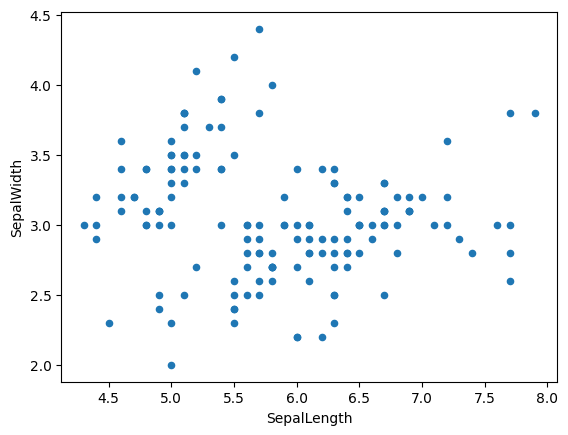

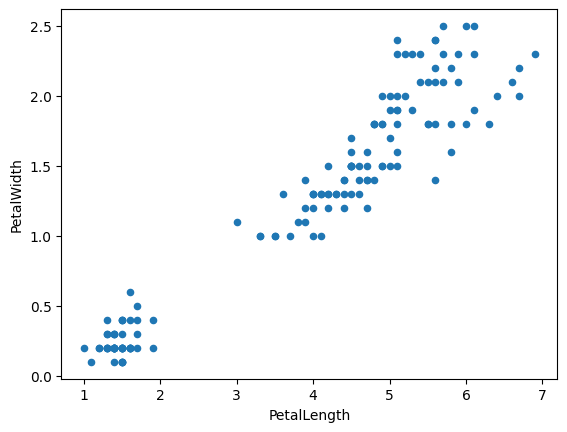

In [ ]:
iris.plot.scatter('SepalLength', 'SepalWidth')

iris.plot.scatter('PetalLength', 'PetalWidth')


Do you make some observations from these plots?

**Plotting using seaborn __[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)__**<br>


## Plotting with Seaborn
The Seaborn library deals smoothly with pandas dataframes, and the plots are more visually appealing. Let's plot each species in a different color:

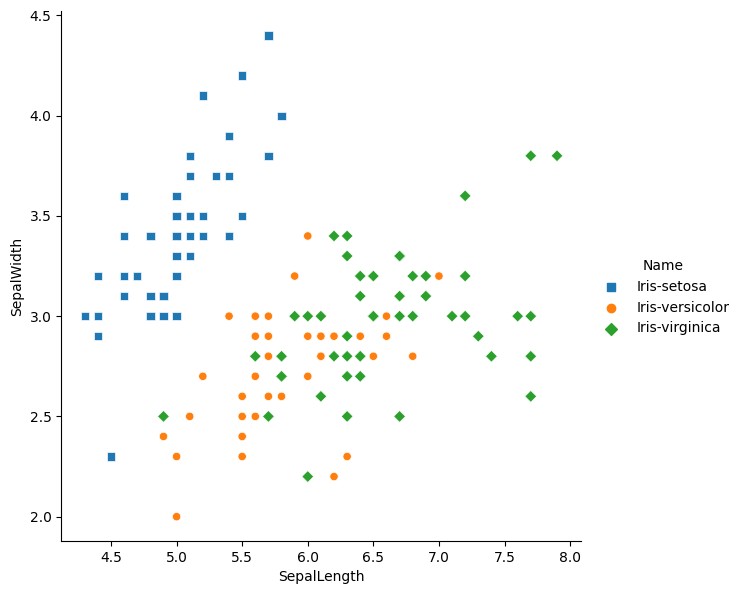

In [ ]:
g = sns.pairplot(iris, height=6, x_vars=["SepalLength"], y_vars=["SepalWidth"], hue="Name",
                 markers=["s", "o", "D"])

# hue determines which column is to be used to define color

Or pairplots as a matrix plot with color-encoded class-specific histograms on the diagonal

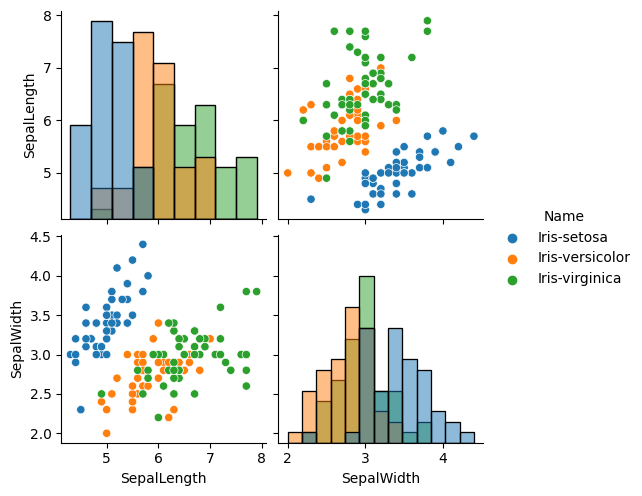

In [ ]:
g = sns.pairplot(iris, vars=["SepalLength", "SepalWidth"], hue="Name", diag_kind="hist")

and with color-coded class-specific [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation)-estimated probability densities on the diagonal

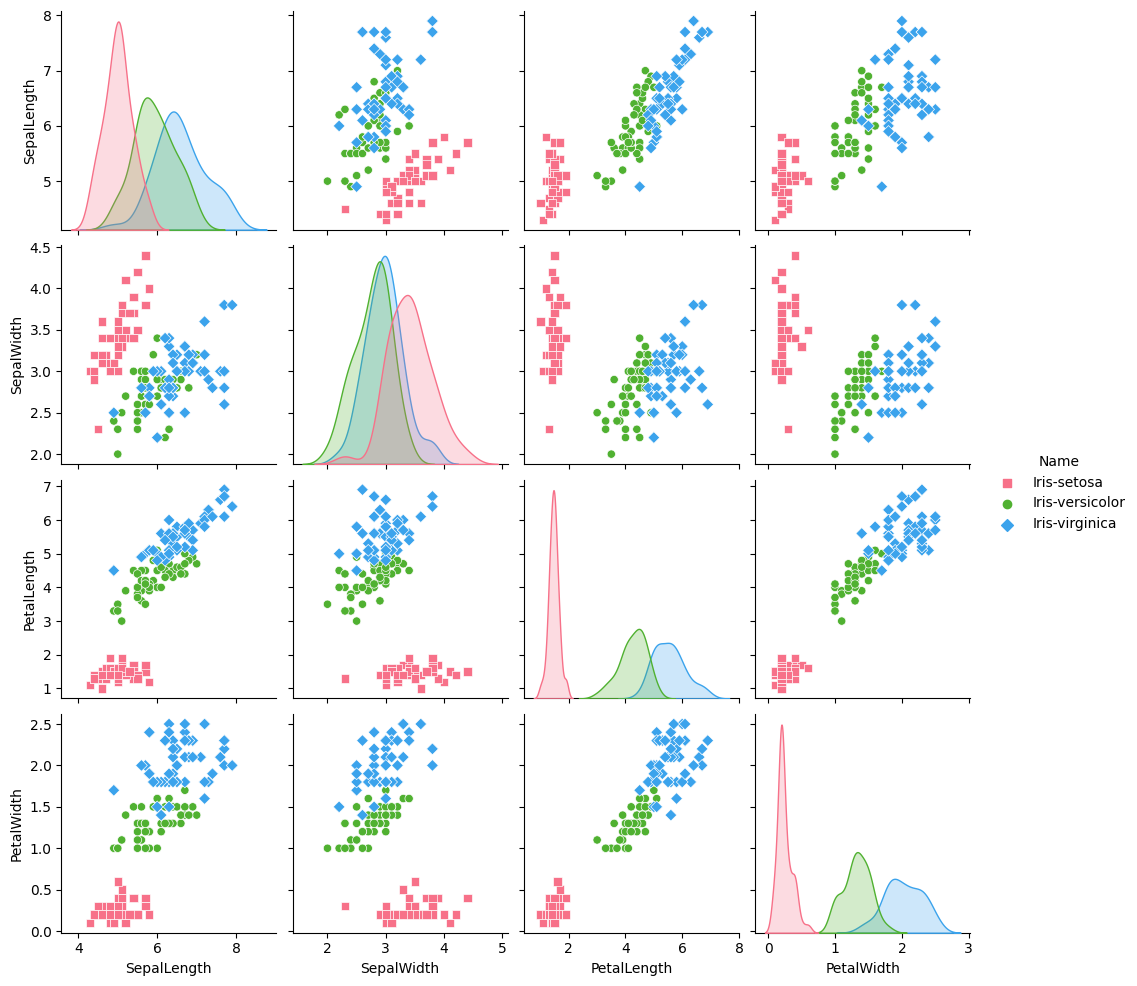

In [ ]:
g = sns.pairplot(iris, hue="Name", palette="husl",  markers=["s", "o", "D"], diag_kind="kde")
# not specifying the columns automatically uses all of them

**Question:** 
 - **Which one of three flowers is easiest to differentiate from the other two flowers based on its Sepal and Petal measurements ?**

# Statistics using Pandas <a name="statistics"></a>

Let us again look at the seminal Fisher [article](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x) based on this data:

<img src="./assets/iris_data_statistics.png" alt="disease network" width="900" />

We can use `.describe()` to calculate simple **descriptive statistics** for the dataset (rounding to 3 decimals):

In [ ]:
iris.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843,0.828,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054,0.434,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.759,1.764,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.199,0.763,0.1,0.3,1.30,1.8,2.5


Computing the **pairwise correlation of columns**/features( the degree of association or relationship between two or more variables. ) using `.corr()`. Variations of correlation measure is also adjustable (e.g. ‘pearson’ (default), ‘kendall’, or ‘spearman’) 

In [ ]:
iris.corr().round(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.00,-0.11,0.87,0.82
SepalWidth,-0.11,1.00,-0.42,-0.36
PetalLength,0.87,-0.42,1.00,0.96
PetalWidth,0.82,-0.36,0.96,1.00


Including only string columns in a DataFrame description

In [ ]:
# like we explained above, object in this case means text
iris.describe(include=[np.object])

,Name
count,150
unique,3
top,Iris-virginica
freq,50


In our case same as excluding numeric columns from a DataFrame description

In [ ]:
iris.describe(exclude=[np.number])

,Name
count,150
unique,3
top,Iris-virginica
freq,50


In order to get statistical values for the different types of iris flowers we can split the object (iris DataFrame) into groups (species)

In [ ]:
grouped = iris.groupby('Name')

In [ ]:
grouped.groups

{'Iris-setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Iris-versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Iris-virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

Describe the group-wise `PetalLength` summary statistics

In [ ]:
print('PetalLength:')
grouped['PetalLength'].describe()

PetalLength:


,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


Iterating through the grouped data is very natural

In [ ]:
for name, group in grouped:
    print(name,':')
    print(group.describe().round(2).head(3))

Iris-setosa :
       SepalLength  SepalWidth  PetalLength  PetalWidth
count        50.00       50.00        50.00       50.00
mean          5.01        3.42         1.46        0.24
std           0.35        0.38         0.17        0.11
Iris-versicolor :
       SepalLength  SepalWidth  PetalLength  PetalWidth
count        50.00       50.00        50.00       50.00
mean          5.94        2.77         4.26        1.33
std           0.52        0.31         0.47        0.20
Iris-virginica :
       SepalLength  SepalWidth  PetalLength  PetalWidth
count        50.00       50.00        50.00       50.00
mean          6.59        2.97         5.55        2.03
std           0.64        0.32         0.55        0.27


**Group-wise feature correlations**

In [ ]:
iris.groupby('Name').corr().round(3)

SepalLength  SepalWidth  PetalLength  PetalWidth
Name                                                                         
Iris-setosa     SepalLength        1.000       0.747        0.264       0.279
                SepalWidth         0.747       1.000        0.177       0.280
                PetalLength        0.264       0.177        1.000       0.306
                PetalWidth         0.279       0.280        0.306       1.000
Iris-versicolor SepalLength        1.000       0.526        0.754       0.546
                SepalWidth         0.526       1.000        0.561       0.664
                PetalLength        0.754       0.561        1.000       0.787
                PetalWidth         0.546       0.664        0.787       1.000
Iris-virginica  SepalLength        1.000       0.457        0.864       0.281
                SepalWidth         0.457       1.000        0.401       0.538
                PetalLength        0.864       0.401        1.000       0.322
                PetalWidth         0.281       0.538        0.322       1.000

DataFrame has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns. Here we add a columns with the ratio between SepalWidth and SepalLength.

In [ ]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength']).head().round(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612
2,4.7,3.2,1.3,0.2,Iris-setosa,0.681
3,4.6,3.1,1.5,0.2,Iris-setosa,0.674
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720


`assign` always returns a copy of the data, leaving the original DataFrame untouched, e.g.

<div class='alert alert-info'>
<h4>Digression: lambda functions</h4>

Lambda functions (anonymous functions) are equivalent to regular functions, only the syntax is different. We only make use of them if we need a function once. Thus the two below functions are equivalent

```python
def add_one(a): return a + 1

add_one = lambda a : a + 1

```

<div class='alert alert-warning'>
<h4>Exercise 5.</h4>Make a new column which is the sum of all the measurements.

In [ ]:
# Ex5


In [ ]:
# %load solutions/ex2_5.py

In [ ]:
iris.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign`  in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<AxesSubplot: xlabel='SepalRatio', ylabel='PetalRatio'>

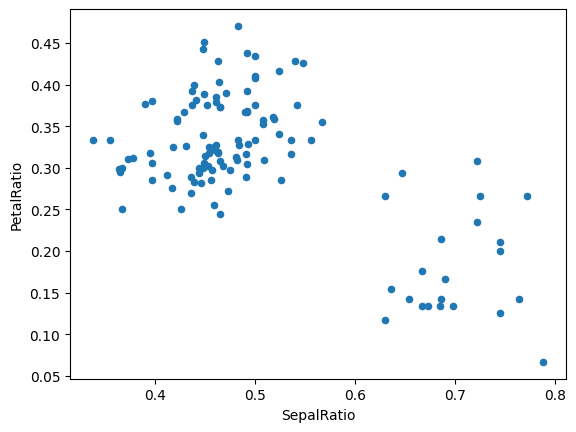

In [ ]:
(iris.query('SepalLength > 5')
 .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
         PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
 .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

<div class='alert alert-warning'>
<h4>Exercise 6.</h4> Compute the mean and standard deviation of the SepalWidth / SepalLength ratio.

**Hint**: use the Tab trick to find the relevant methods, or just make an online search.

In [ ]:
# Ex6


In [ ]:
# %load solutions/ex2_6.py

---

You can continue to notebook PART 2 which includes examples of:
- Object creation
- More advanced indexing
- Operations
- Merging
- Grouping
- Reshaping
- Categoricals
- Writing and loading data

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=174a646e-27d4-4666-a2b4-2d7bb1c47bf5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>